In [4]:
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd


In [6]:
x_train = np.array([1,2,3])
y_train = np.array([2,3,6])
type(x_train)

numpy.ndarray

In [8]:
x_train.shape

(3,)

In [10]:
x_train = x_train.reshape(3,1)
x_train.shape

(3, 1)

(3, 1) (3,)


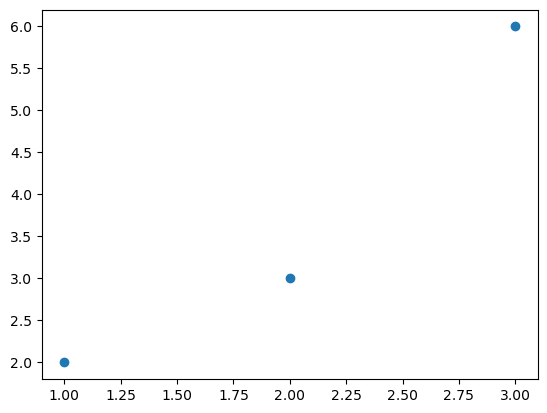

In [12]:
# Make a simple scatterplot
plt.scatter(x_train,y_train)

# check dimensions 
print(x_train.shape,y_train.shape)

<Axes: title={'center': 'A nice plot'}, xlabel='$x$', ylabel='$y$'>

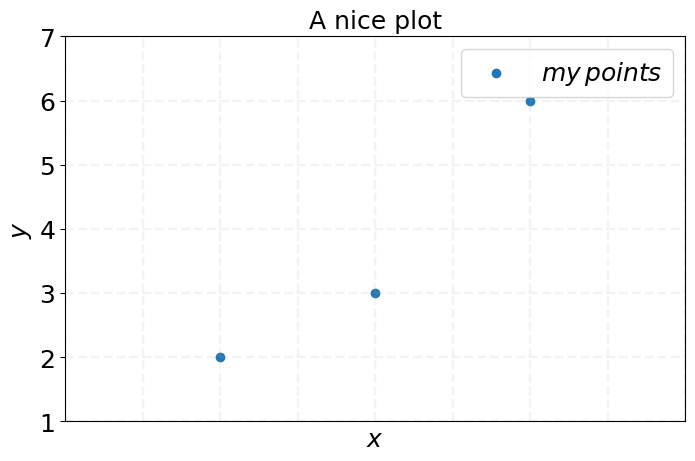

In [14]:
def nice_scatterplot(x, y, title):
    # font size
    f_size = 18
    
    # make the figure
    fig, ax = plt.subplots(1,1, figsize=(8,5)) # Create figure object

    # set axes limits to make the scale nice
    ax.set_xlim(np.min(x)-1, np.max(x) + 1)
    ax.set_ylim(np.min(y)-1, np.max(y) + 1)

    # adjust size of tickmarks in axes
    ax.tick_params(labelsize = f_size)
    
    # remove tick labels
    ax.tick_params(labelbottom=False,  bottom=False)
    
    # adjust size of axis label
    ax.set_xlabel(r'$x$', fontsize = f_size)
    ax.set_ylabel(r'$y$', fontsize = f_size)
    
    # set figure title label
    ax.set_title(title, fontsize = f_size)

    # you may set up grid with this 
    ax.grid(True, lw=1.75, ls='--', alpha=0.15)

    # make actual plot (Notice the label argument!)
    #ax.scatter(x, y, label=r'$My points$')
    #ax.scatter(x, y, label='$My points$')
    ax.scatter(x, y, label=r'$my\,points$')
    ax.legend(loc='best', fontsize = f_size);
    
    return ax

nice_scatterplot(x_train, y_train, 'A nice plot')


In [16]:
#solution
xx = np.array([[1,2,3],[4,6,8]])
xxx = xx.reshape(-1,2)
xxx.shape

(3, 2)

In [18]:
# Reshape to be a proper 2D array
x_train = x_train.reshape(x_train.shape[0], 1)
y_train = y_train.reshape(y_train.shape[0], 1)

print(x_train.shape)

(3, 1)


In [20]:
# first, compute means
y_bar = np.mean(y_train)
x_bar = np.mean(x_train)

# build the two terms
numerator = np.sum( (x_train - x_bar)*(y_train - y_bar) )
denominator = np.sum((x_train - x_bar)**2)

print(numerator.shape, denominator.shape) #check shapes

() ()


In [22]:
#slope beta1
a = numerator/denominator

#intercept beta0
b = y_bar - a * x_bar

print("The best-fit line is {0:3.2f} + {1:3.2f} * x".format(b, a))
print(f'The best fit is {b}')

The best-fit line is -0.33 + 2.00 * x
The best fit is -0.3333333333333335


In [24]:
def simple_linear_regression_fit(x_train: np.ndarray, y_train: np.ndarray) -> np.ndarray:
    """
    Inputs:
    x_train: a (num observations by 1) array holding the values of the predictor variable
    y_train: a (num observations by 1) array holding the values of the response variable

    Returns:
    beta_vals:  a (num_features by 1) array holding the intercept and slope coeficients
    """
    
    # Check input array sizes
    if len(x_train.shape) < 2:
        print("Reshaping features array.")
        x_train = x_train.reshape(x_train.shape[0], 1)

    if len(y_train.shape) < 2:
        print("Reshaping observations array.")
        y_train = y_train.reshape(y_train.shape[0], 1)

    # first, compute means
    y_bar = np.mean(y_train)
    x_bar = np.mean(x_train)

    # build the two terms
    numerator = np.sum( (x_train - x_bar)*(y_train - y_bar) )
    denominator = np.sum((x_train - x_bar)**2)
    
    #slope a
    a = numerator/denominator

    #intercept b
    b = y_bar - beta_1*x_bar

    return np.array([b,a])